In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Define the base URL for the Census API (ACS 5-year estimates)
URL = "https://api.census.gov/data/2022/acs/acs5"

# Import U.S. Census API Key
from config import api_key
#api_key = "api_key"


  Home_Workers Group  B19013_001E
0                Low      74014.0
1             Medium      79325.0
2               High      56969.5
3          Very High      72052.0


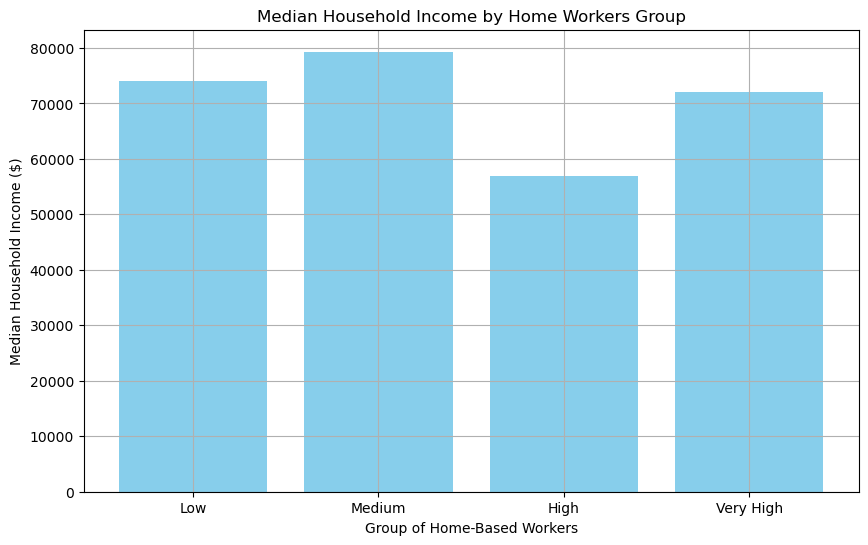

In [9]:
# Parameters for the request
params = {
    'get': 'NAME,B08134_004E,B19013_001E',  # B08134_004E = Work at home, B19013_001E = Median Household Income
    'for': 'state:*',  # Data for all states
    'key': api_key
}

# Send the request to the Census API
response = requests.get(URL, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    data = response.json()
    
    # Extract the column headers and rows of data
    columns = data[0]
    rows = data[1:]
    
    # Convert to DataFrame
    df = pd.DataFrame(rows, columns=columns)
    
    # Convert income and work-at-home data to numeric (if necessary) for analysis
    df['B19013_001E'] = pd.to_numeric(df['B19013_001E'], errors='coerce')  # Median Household Income
    df['B08134_004E'] = pd.to_numeric(df['B08134_004E'], errors='coerce')  # Work-at-home data
    
    # Convert the state names to a more readable format if necessary
    df['State'] = df['NAME']
    
    # Drop the 'NAME' column as it's redundant now
    df = df.drop(columns=['NAME'])
    
    # Create income bins (for example, Low, Medium, High based on home-based workers)
    bins = [0, 50000, 100000, 200000, float('inf')]  # You can adjust these ranges based on your data
    labels = ['Low', 'Medium', 'High', 'Very High']
    
    # Create a new column for the income group
    df['Home_Workers Group'] = pd.cut(df['B08134_004E'], bins=bins, labels=labels)
    
    # Group by the 'Home_Workers Group' and calculate the median household income for each group
    grouped_df = df.groupby('Home_Workers Group', observed=False)['B19013_001E'].median().reset_index()
    
    # Display the grouped data
    print(grouped_df)
    
    # Plot the data: Home-based worker groups vs Median Household Income
    plt.figure(figsize=(10, 6))
    plt.bar(grouped_df['Home_Workers Group'], grouped_df['B19013_001E'], color='skyblue')
    plt.title('Median Household Income by Home Workers Group')
    plt.xlabel('Group of Home-Based Workers')
    plt.ylabel('Median Household Income ($)')
    plt.grid(True)
    plt.show()

else:
    print(f"Error: {response.status_code}")